## Final: Rep1 10262022

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from FlowCytometryTools import FCMeasurement
from skimage.filters import threshold_mean
from scipy import stats
from scipy.stats import hypergeom
import statsmodels
from statsmodels.sandbox.stats.multicomp import multipletests
from sklearn import preprocessing

import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
cd /Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Data/eEMC012/eEMC012_Fraction/

/Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Data/eEMC012/eEMC012_Fraction


In [4]:
files_cts1=np.array(sorted(os.listdir('.'))[0:12]).reshape(3,4)
files_bud2=np.array(sorted(os.listdir('.'))[12:24]).reshape(3,4)

In [5]:
def fcs_reader(f):
    fsc_vals=np.array(FCMeasurement(ID="",datafile=f)['FSC-A'])[0:3000]
    yellow_vals=np.array(FCMeasurement(ID="",datafile=f)['FITC-A'])[0:3000]
    red_vals=np.array(FCMeasurement(ID="",datafile=f)['PE Texas Red-A'])[0:3000]
    return fsc_vals,yellow_vals,red_vals

In [6]:
r_c=[]
y_c=[]
m_c=[]
for j in range(4):
    fsc_raw=np.array(fcs_reader(files_cts1[0][j])[0])
    yellow_raw=np.array(fcs_reader(files_cts1[0][j])[1])
    red_raw=np.array(fcs_reader(files_cts1[0][j])[2])
    red=red_raw[(fsc_raw>0)]/fsc_raw[(fsc_raw>0)]
    yellow=yellow_raw[(fsc_raw>0)]/fsc_raw[(fsc_raw>0)]
    fsc=fsc_raw[(fsc_raw>0)]
    cols=['red' if r>0.01 and y<0.05 else 'blue' for r,y in zip(red,yellow)]

#     plt.figure(figsize=(4,4))
#     plt.scatter(red,yellow,s=0.5)
#     plt.plot([0,0.5],[0.04,0.04],linestyle='--',color='yellow',linewidth=2)
#     plt.plot([0.015,0.015],[0,1.5],linestyle='--',color='red',linewidth=2)
#     plt.xlim(-0.01,0.5)
#     plt.ylim(0,1.2)
#     plt.tight_layout()

    r_f=sum(yellow<=0.04)/len(red)
    y_f=sum(red<=0.015)/len(red)
    m_f=1-y_f-r_f
#     print('Germline:',r_f)
#     print('Somatic:',y_f)
#     print('Mix:',m_f)
    
    r_c.append(r_f)
    y_c.append(y_f)
    m_c.append(m_f)

In [7]:
r_b=[]
y_b=[]
m_b=[]
for j in range(4):
    fsc_raw=np.array(fcs_reader(files_bud2[0][j])[0])
    yellow_raw=np.array(fcs_reader(files_bud2[0][j])[1])
    red_raw=np.array(fcs_reader(files_bud2[0][j])[2])
    red=red_raw[(fsc_raw>0)]/fsc_raw[(fsc_raw>0)]
    yellow=yellow_raw[(fsc_raw>0)]/fsc_raw[(fsc_raw>0)]
    fsc=fsc_raw[(fsc_raw>0)]
    cols=['red' if r>0.01 and y<0.05 else 'blue' for r,y in zip(red,yellow)]

#     plt.figure(figsize=(4,4))
#     plt.scatter(red,yellow,s=0.5)
#     plt.plot([0,0.5],[0.04,0.04],linestyle='--',color='yellow',linewidth=2)
#     plt.plot([0.015,0.015],[0,1.5],linestyle='--',color='red',linewidth=2)
#     plt.xlim(-0.01,0.5)
#     plt.ylim(0,1.2)
#     plt.tight_layout()

    r_f=sum(yellow<=0.04)/len(red)
    y_f=sum(red<=0.015)/len(red)
    m_f=1-y_f-r_f
#     print('Germline:',r_f)
#     print('Somatic:',y_f)
#     print('Mix:',m_f)
    r_b.append(r_f)
    y_b.append(y_f)
    m_b.append(m_f)

In [8]:
r_c.extend(r_b)
y_c.extend(y_b)
m_c.extend(m_b)

r_arr=np.array(r_c).reshape(2,4).transpose().reshape(8,1)
y_arr=np.array(y_c).reshape(2,4).transpose().reshape(8,1)
m_arr=np.array(m_c).reshape(2,4).transpose().reshape(8,1)

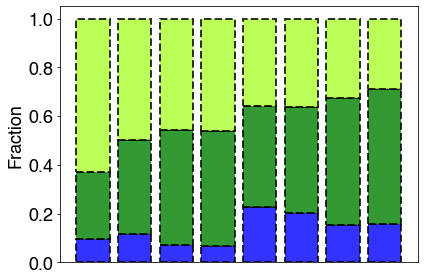

In [9]:
a=0.8
plt.rc('font',family='helvetica')
plt.figure(figsize=(6,4))
plt.bar([0,1,2,3,4,5,6,7], r_c, color='blue',edgecolor='black',linewidth=2,linestyle='--',alpha=a)
plt.bar([0,1,2,3,4,5,6,7], m_c, bottom=r_c, color='green',edgecolor='black',linewidth=2,linestyle='--',alpha=a)
plt.bar([0,1,2,3,4,5,6,7], y_c, bottom=np.array(m_c)+np.array(r_c), color='greenyellow',edgecolor='black',linewidth=2,linestyle='--',alpha=a)
# plt.xlabel(r'Kissing Number',fontsize=18)
plt.ylabel(r'Fraction',fontsize=18)
plt.xticks([],fontsize=18)
plt.yticks(fontsize=18)
# plt.ylim(0,1.1)
plt.tight_layout()
plt.savefig('/Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Figures/Final/all_fraction.jpg')